In [78]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import copy

from math import floor, ceil

In [79]:
def NN_Interpolate(img, i, j):
    """
    Nearest Neighbor Interpolation
    
    Parameters:
        img(matrix) - initial unchanged image
        i(int) -  i-th index
        j(int) - j-th index
        
    Return:
        list(neighbor or exact pixel from initial image)
    """
    return img[floor(i*img.shape[0]), floor(j*img.shape[1])]

In [80]:
def Sampling(shape, i, j):
    """
    Uniform Sampling
    
    Parameters:
        shape(list or tuple) - shape of the image we want sample from
        i(int) -  i-th index
        j(int) - j-th index
        
    Returns:
        tuple(of floats) - sampled pixel
    """
    H, W = shape
    return (2*i+1)/(2*H), (2*j+1)/(2*W)

In [81]:
def Image_Resizing(initial_img, new_img_shape):
    """
    Image Resizing
    
    Parameters:
        initial_img(matrix) - initial unchanged image
        new_img_shape(list or tuple) - shape of the new image 
        
    Returns:
        matrix(resized image)
    """
    
    H, W = initial_img.shape
    H_n, W_n = new_img_shape

    new_image = np.zeros(new_img_shape, dtype=float)

    for x in range(H_n):
        for y in range(W_n):
            new_image[x, y] = NN_Interpolate(initial_img, Sampling(new_img_shape, x, y)[0], Sampling(new_img_shape, x, y)[1])
    return new_image

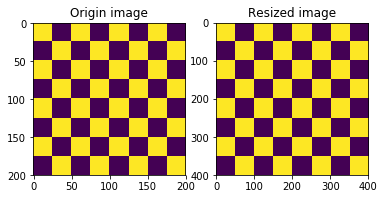

In [82]:
img=mpimg.imread('inputs/20190926/1.png')

plt.subplot(1,2,1)
plt.title('Origin image')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('Resized image')

new_image_shape = tuple([2*x for x in img.shape])

# new_image_shape = [500, 500]

resized = Image_Resizing(img, new_image_shape)

plt.imshow(resized)

plt.show();

# Another Way

In [83]:
def resize_NN(img, shape):
    H, W = img.shape
    H_n, W_n = shape
    A_p = np.zeros(shape)
    for i in range(H_n):
        for j in range(W_n):
            x, y = (2*i + 1)/(2*H_n), (2*j + 1)/(2*W_n)
            A_p[i, j] = img[int(x*H), int(y*W)]
    return A_p

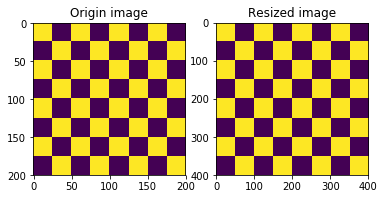

In [84]:
plt.subplot(1,2,1)
plt.title('Origin image')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('Resized image')

new_image_shape = tuple([2*x for x in img.shape])

# new_image_shape = [500, 500]

resized = resize_NN(img, new_image_shape)

plt.imshow(resized)

plt.show();